## Modeling The Data ##

In [1]:
#import necessary programs 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import numpy as np
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv('./data/EDA.csv')

In [3]:
df.head()
df=df.drop(['Unnamed: 0'],axis=1) #forgot to tell it not to include this again

#### Final Modeling ####

Now that we've traversed preprocessing and exploratory data analysis it's time to begin putting together the final model. 

In [4]:
#creating variables for the train model 
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [5]:
train,test = train_test_split(df) #Using train/test split 
print(len(train), len(test))
train.head()

12708 4237


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,...,month_sold_11,month_sold_12,month_sold_2,month_sold_3,month_sold_4,month_sold_5,month_sold_6,month_sold_7,month_sold_8,month_sold_9
14764,187000.0,2,1.00,860,5400,1.0,0.0,4,5,0.0,...,0,0,0,0,0,0,0,0,0,0
3527,140000.0,3,1.00,1240,8000,1.0,0.0,4,6,200.0,...,0,0,1,0,0,0,0,0,0,0
259,640000.0,2,1.00,1070,5000,1.0,0.0,3,7,0.0,...,0,0,0,0,1,0,0,0,0,0
12821,815000.0,3,3.75,2780,5002,2.0,0.0,3,10,0.0,...,0,0,0,0,0,0,0,0,0,0
6544,640000.0,3,2.00,1380,4800,1.0,0.0,3,7,0.0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_basement', 'sqft_living15',
       'Geo_Clusters_1', 'Geo_Clusters_2', 'Geo_Clusters_3', 'Geo_Clusters_4',
       'Geo_Clusters_5', 'Geo_Clusters_6', 'year_renovated_11',
       'year_renovated_12', 'year_renovated_3', 'year_renovated_4',
       'year_renovated_5', 'year_renovated_6', 'year_renovated_7',
       'year_renovated_8', 'year_renovated_9', 'waterfront_1', 'year_built_1',
       'year_built_10', 'year_built_11', 'year_built_2', 'year_built_3',
       'year_built_4', 'year_built_5', 'year_built_6', 'year_built_7',
       'year_built_8', 'year_built_9', 'year_built_nan', 'month_sold_10',
       'month_sold_11', 'month_sold_12', 'month_sold_2', 'month_sold_3',
       'month_sold_4', 'month_sold_5', 'month_sold_6', 'month_sold_7',
       'month_sold_8', 'month_sold_9'],
      dtype='object')

In [7]:
#the initial model 
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     571.9
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:05:47   Log-Likelihood:            -1.6752e+05
No. Observations:               12708   AIC:                         3.351e+05
Df Residuals:                   12658   BIC:                         3.355e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.007e+05   2.09e+04    -14.359      0.000   -3.42e+05    -2.6e+05
bedrooms          -1.377e+04   1921.187     -7.170      0.000   -1.75e+04      -1e+04
bathrooms            2.5e+04   3055.222      8.183      0.000     1.9e+04     3.1e+04
sqft_living         101.7157      4.058     25.066      0.000      93.762     109.670
sqft_lot             -4.3038      0.564     -7.627      0.000      -5.410      -3.198
floors             4933.6865   3650.979      1.351      0.177   -2222.786    1.21e+04
view               4.825e+04   2114.445     22.819      0.000    4.41e+04    5.24e+04
condition          3.353e+04   1997.977     16.782      0.000    2.96e+04    3.74e+04
grade              9.008e+04   1960.985     45.936      0.000    8.62e+04    9.39e+04
sqft_basement        -5.2833      4.429     -1.193      0.233     -13.965       3.398
sqft_living15        46.5942      3.565     13.069      0.000      39.606      53.582
Geo_Clusters_1    -2.265e+05   4701.997    -48.166      0.000   -2.36e+05   -2.17e+05
Geo_Clusters_2     -7.54e+04   5883.976    -12.814      0.000   -8.69e+04   -6.39e+04
Geo_Clusters_3    -2.023e+05   5390.307    -37.533      0.000   -2.13e+05   -1.92e+05
Geo_Clusters_4    -1.074e+05   4285.426    -25.063      0.000   -1.16e+05    -9.9e+04
Geo_Clusters_5    -9.933e+04   3475.172    -28.583      0.000   -1.06e+05   -9.25e+04
Geo_Clusters_6     7803.8110   4373.741      1.784      0.074    -769.385    1.64e+04
year_renovated_11 -9045.2331   1.87e+04     -0.485      0.628   -4.56e+04    2.75e+04
year_renovated_12 -8.402e+04   1.28e+04     -6.545      0.000   -1.09e+05   -5.89e+04
year_renovated_3  -1.409e+05   7.57e+04     -1.861      0.063   -2.89e+05    7483.579
year_renovated_4   -1.37e+05   5.91e+04     -2.316      0.021   -2.53e+05   -2.11e+04
year_renovated_5  -1.548e+05   4.49e+04     -3.447      0.001   -2.43e+05   -6.68e+04
year_renovated_6  -1.339e+05   3.22e+04     -4.157      0.000   -1.97e+05   -7.08e+04
year_renovated_7  -1.106e+05   2.97e+04     -3.718      0.000   -1.69e+05   -5.23e+04
year_renovated_8  -9.678e+04   2.05e+04     -4.723      0.000   -1.37e+05   -5.66e+04
year_renovated_9  -3.193e+04   1.95e+04     -1.640      0.101   -7.01e+04    6241.152
waterfront_1       3.965e+05   3.07e+04     12.920      0.000    3.36e+05    4.57e+05
year_built_1      -8885.1392   8329.737     -1.067      0.286   -2.52e+04    7442.407
year_built_10     -1.908e+05   7773.190    -24.547      0.000   -2.06e+05   -1.76e+05
year_built_11     -1.599e+05   8874.146    -18.017      0.000   -1.77e+05   -1.42e+05
year_built_2      -2.596e+04   7537.410     -3.444      0.001   -4.07e+04   -1.12e+04
year_built_3      -4.162e+04   9118.104     -4.565      0.000   -5.95e+04   -2.37e+04
year_built_4       -7.01e+04   7203.898     -9.731      0.000   -8.42e+04

That R^2 value isn't too bad, but some of the p-values are insignficant.

In [8]:
#creating a table to p-values which are below our alpha of .05
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

50 32
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-3.007e+05,2.09e+04,-14.359,0.0,-3.42e+05,-2.6e+05
bedrooms,-1.377e+04,1921.187,-7.170,0.0,-1.75e+04,-1e+04
bathrooms,2.5e+04,3055.222,8.183,0.0,1.9e+04,3.1e+04
sqft_living,101.7157,4.058,25.066,0.0,93.762,109.670
sqft_lot,-4.3038,0.564,-7.627,0.0,-5.410,-3.198


Deleting 18 features from the model. 

In [9]:
#Try again
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     873.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:05:47   Log-Likelihood:            -1.6754e+05
No. Observations:               12708   AIC:                         3.352e+05
Df Residuals:                   12675   BIC:                         3.354e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -3.11e+05   1.66e+04    -18.712      0.000   -3.44e+05   -2.78e+05
bedrooms           -1.32e+04   1915.910     -6.889      0.000    -1.7e+04   -9442.950
bathrooms          2.458e+04   2980.643      8.246      0.000    1.87e+04    3.04e+04
sqft_living          99.4058      3.646     27.262      0.000      92.259     106.553
sqft_lot             -4.1873      0.530     -7.907      0.000      -5.225      -3.149
view               4.775e+04   2095.164     22.788      0.000    4.36e+04    5.19e+04
condition          3.326e+04   1989.466     16.721      0.000    2.94e+04    3.72e+04
grade              9.064e+04   1908.313     47.500      0.000    8.69e+04    9.44e+04
sqft_living15        48.0058      3.475     13.813      0.000      41.194      54.818
Geo_Clusters_1    -2.298e+05   4166.297    -55.166      0.000   -2.38e+05   -2.22e+05
Geo_Clusters_2    -7.828e+04   5451.621    -14.360      0.000    -8.9e+04   -6.76e+04
Geo_Clusters_3    -2.061e+05   4838.094    -42.600      0.000   -2.16e+05   -1.97e+05
Geo_Clusters_4    -1.108e+05   3693.194    -30.007      0.000   -1.18e+05   -1.04e+05
Geo_Clusters_5    -1.019e+05   3300.940    -30.878      0.000   -1.08e+05   -9.55e+04
year_renovated_12 -7.204e+04   8310.135     -8.669      0.000   -8.83e+04   -5.57e+04
year_renovated_4  -1.262e+05   5.83e+04     -2.163      0.031    -2.4e+05   -1.18e+04
year_renovated_5  -1.446e+05   4.38e+04     -3.300      0.001    -2.3e+05   -5.87e+04
year_renovated_6   -1.22e+05   3.07e+04     -3.976      0.000   -1.82e+05   -6.19e+04
year_renovated_7  -9.775e+04   2.81e+04     -3.480      0.001   -1.53e+05   -4.27e+04
year_renovated_8  -8.294e+04    1.8e+04     -4.609      0.000   -1.18e+05   -4.77e+04
waterfront_1        3.97e+05   3.07e+04     12.947      0.000    3.37e+05    4.57e+05
year_built_10     -1.819e+05   6102.043    -29.811      0.000   -1.94e+05    -1.7e+05
year_built_11     -1.516e+05   7489.242    -20.245      0.000   -1.66e+05   -1.37e+05
year_built_2      -2.411e+04   6115.379     -3.942      0.000   -3.61e+04   -1.21e+04
year_built_3      -4.014e+04   7964.186     -5.040      0.000   -5.57e+04   -2.45e+04
year_built_4      -6.889e+04   5648.551    -12.197      0.000      -8e+04   -5.78e+04
year_built_5      -9.378e+04   5553.548    -16.887      0.000   -1.05e+05   -8.29e+04
year_built_6      -1.255e+05   5781.137    -21.710      0.000   -1.37e+05   -1.14e+05
year_built_7      -1.647e+05   6083.782    -27.078      0.000   -1.77e+05   -1.53e+05
year_built_8      -1.593e+05   6389.908    -24.924      0.000   -1.72e+05   -1.47e+05
year_built_9      -1.713e+05   6708.303    -25.531      0.000   -1.84e+05   -1.58e+05
month_sold_3       3.375e+04   4052.010      8.328      0.000    2.58e+04    4.17e+04
month_sold_4       3.617e+04   3760.559      9.617      0.000    2.88e+04

Our model is looking great now! The R^2 value is reasonable and all the p-values are below the alpha level. 

#### Validation ####

The first thing I want to do is try out the model on the test data to make sure the data was not over or under fitted. 

In [10]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     296.7
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:05:47   Log-Likelihood:                -55742.
No. Observations:                4237   AIC:                         1.115e+05
Df Residuals:                    4204   BIC:                         1.118e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.012e+05   2.86e+04    -10.517      0.000   -3.57e+05   -2.45e+05
bedrooms          -9557.6933   3196.819     -2.990      0.003   -1.58e+04   -3290.239
bathrooms          1.225e+04   5003.411      2.449      0.014    2445.381    2.21e+04
sqft_living          96.9368      6.146     15.773      0.000      84.888     108.986
sqft_lot             -4.1302      0.913     -4.522      0.000      -5.921      -2.339
view               4.574e+04   3524.204     12.979      0.000    3.88e+04    5.27e+04
condition           3.36e+04   3423.952      9.815      0.000    2.69e+04    4.03e+04
grade              9.186e+04   3312.146     27.734      0.000    8.54e+04    9.84e+04
sqft_living15        53.2107      5.945      8.951      0.000      41.556      64.866
Geo_Clusters_1    -2.219e+05   6885.355    -32.229      0.000   -2.35e+05   -2.08e+05
Geo_Clusters_2    -7.261e+04   9609.903     -7.556      0.000   -9.14e+04   -5.38e+04
Geo_Clusters_3    -2.027e+05   8289.976    -24.456      0.000   -2.19e+05   -1.86e+05
Geo_Clusters_4    -9.588e+04   6359.870    -15.076      0.000   -1.08e+05   -8.34e+04
Geo_Clusters_5    -9.489e+04   5513.439    -17.211      0.000   -1.06e+05   -8.41e+04
year_renovated_12 -9.644e+04   1.44e+04     -6.677      0.000   -1.25e+05   -6.81e+04
year_renovated_4  -1.119e+05   9.02e+04     -1.240      0.215   -2.89e+05     6.5e+04
year_renovated_5  -9.138e+04   6.56e+04     -1.393      0.164    -2.2e+05    3.72e+04
year_renovated_6  -2.001e+05   4.67e+04     -4.283      0.000   -2.92e+05   -1.09e+05
year_renovated_7  -1.182e+05   4.96e+04     -2.384      0.017   -2.15e+05    -2.1e+04
year_renovated_8  -1.075e+05   3.08e+04     -3.486      0.000   -1.68e+05    -4.7e+04
waterfront_1       2.419e+05   4.49e+04      5.390      0.000    1.54e+05     3.3e+05
year_built_10     -1.697e+05   1.02e+04    -16.642      0.000    -1.9e+05    -1.5e+05
year_built_11     -1.327e+05   1.26e+04    -10.524      0.000   -1.57e+05   -1.08e+05
year_built_2      -1.347e+04   1.03e+04     -1.308      0.191   -3.37e+04    6719.113
year_built_3      -4.133e+04   1.42e+04     -2.914      0.004   -6.91e+04   -1.35e+04
year_built_4      -6.624e+04   9416.512     -7.034      0.000   -8.47e+04   -4.78e+04
year_built_5      -8.909e+04   9259.473     -9.622      0.000   -1.07e+05   -7.09e+04
year_built_6      -1.348e+05   9803.511    -13.747      0.000   -1.54e+05   -1.16e+05
year_built_7      -1.538e+05      1e+04    -15.333      0.000   -1.73e+05   -1.34e+05
year_built_8      -1.549e+05   1.07e+04    -14.524      0.000   -1.76e+05   -1.34e+05
year_built_9      -1.573e+05   1.16e+04    -13.608      0.000    -1.8e+05   -1.35e+05
month_sold_3       1.703e+04   6934.078      2.455      0.014    3431.448    3.06e+04
month_sold_4       3.503e+04   6320.644      5.542      0.000    2.26e+04

The R^2 values are quite similar, which is a good sign, but let's keep going. I'd like to see if the residuals are similar as well.

#### Train Test Split for Validation ####

In [11]:
#create x/y values for the info
y = df[['price']]
X = df[x_cols]

In [12]:
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
#Finding the predicted Y values for each side of the plit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model_test = linreg.fit(X_train, y_train)

y_hat_train = model_test.predict(X_train)
y_hat_test = model_test.predict(X_test)

In [14]:
#calculating residuals 
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [15]:
#Calculating the mean standard error of the residuakls
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

R_squared = model_test.score(X_test, y_test)
print('This iteration has an R-squared value of:', R_squared)

Train Mean Squarred Error: 16548601539.872772
Test Mean Squarred Error: 15720000831.962992
This iteration has an R-squared value of: 0.6946138089305688


They're in the ballpark of each other w/ a relatively high R^2 values.

#### Residuals and QQplots of each feature ####

Let's explore the residual mapping and qqplots of each feature checking for normality and homoscedasticity

KC Housing Data - Regression Analysis and Diagnostics for SalePrice~bedrooms
-------------------------------------------------------------------------------------


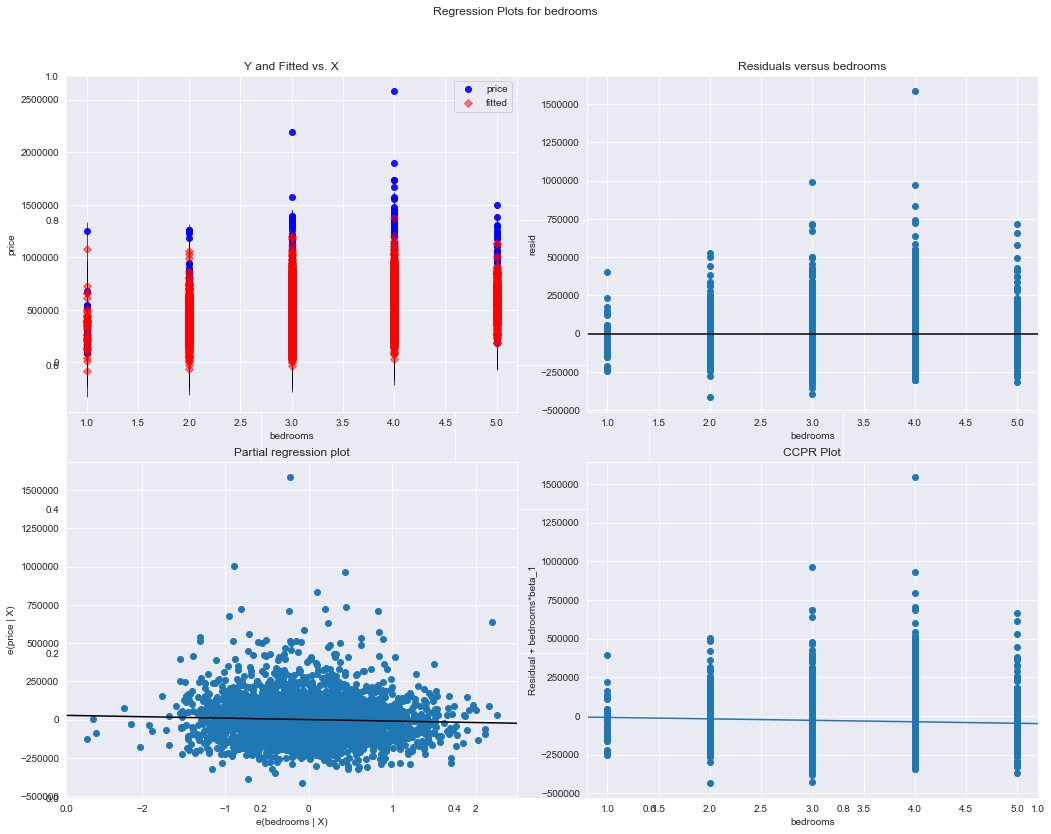

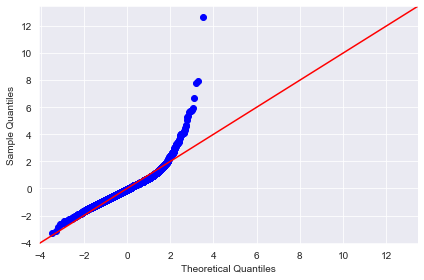

KC Housing Data - Regression Analysis and Diagnostics for SalePrice~bathrooms
-------------------------------------------------------------------------------------


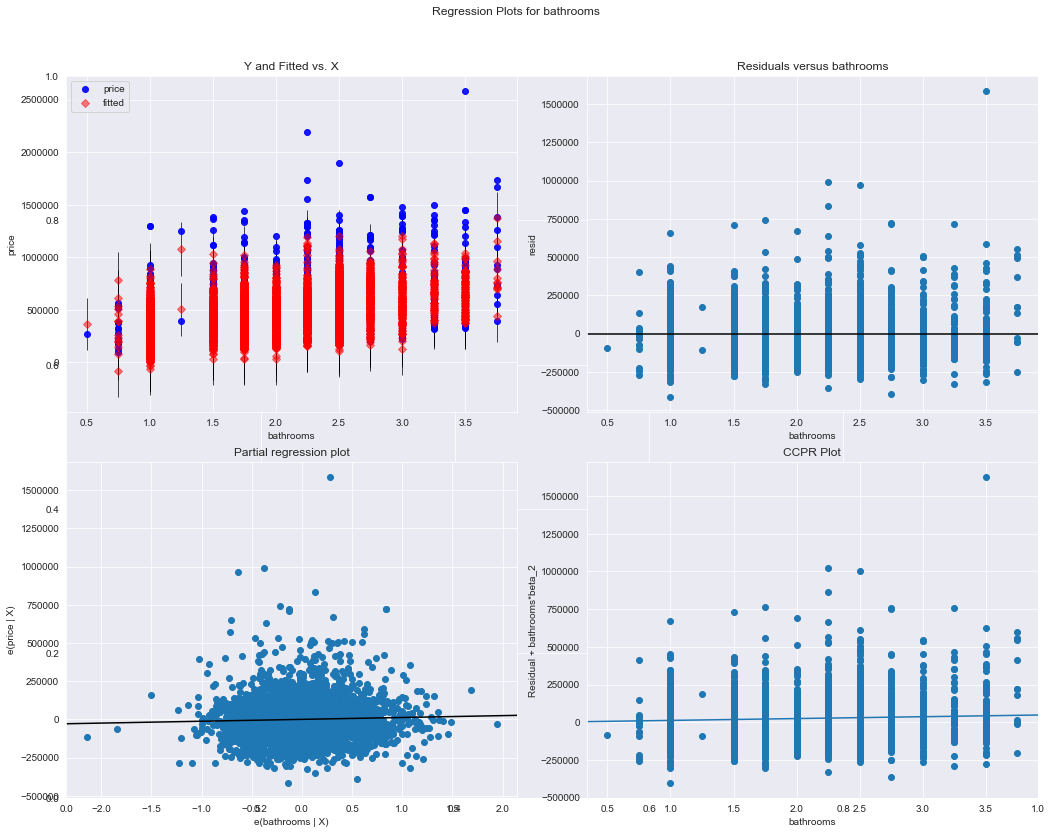

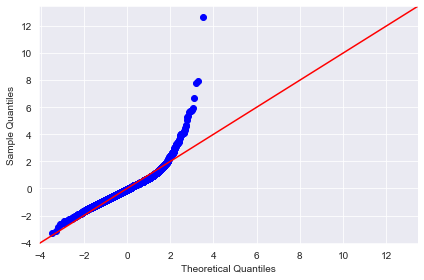

KC Housing Data - Regression Analysis and Diagnostics for SalePrice~sqft_living
-------------------------------------------------------------------------------------


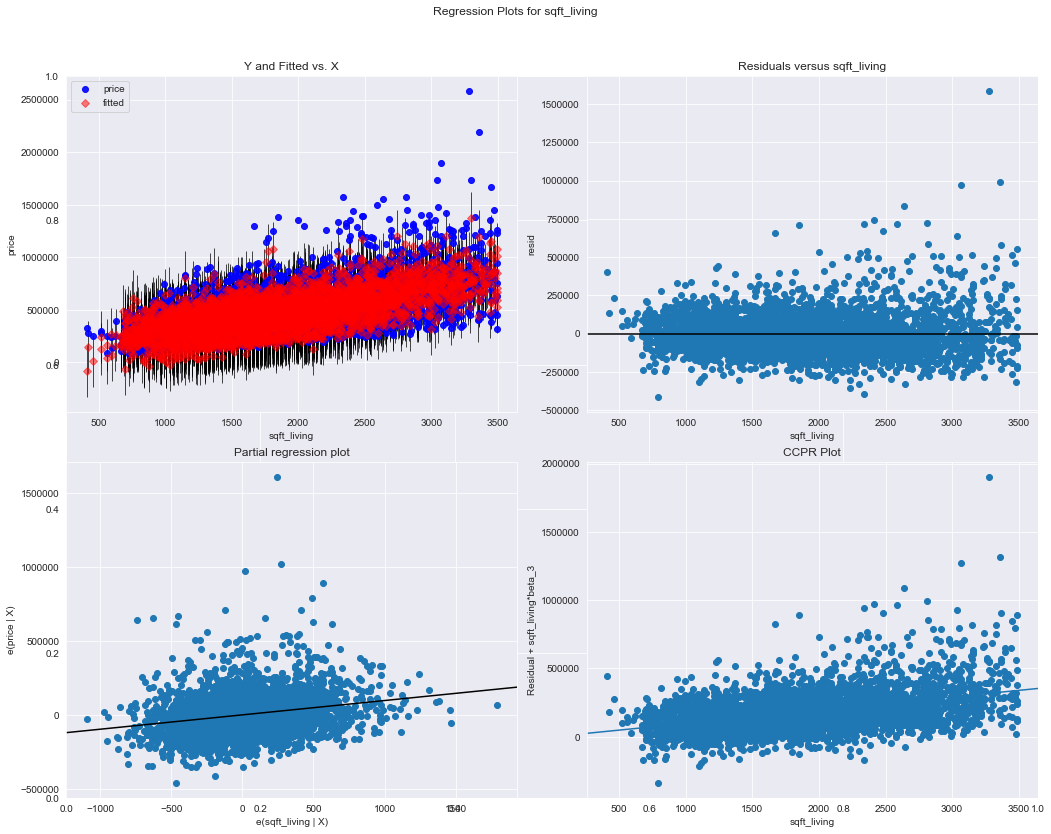

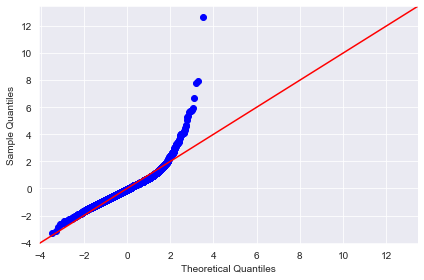

KC Housing Data - Regression Analysis and Diagnostics for SalePrice~sqft_lot
-------------------------------------------------------------------------------------


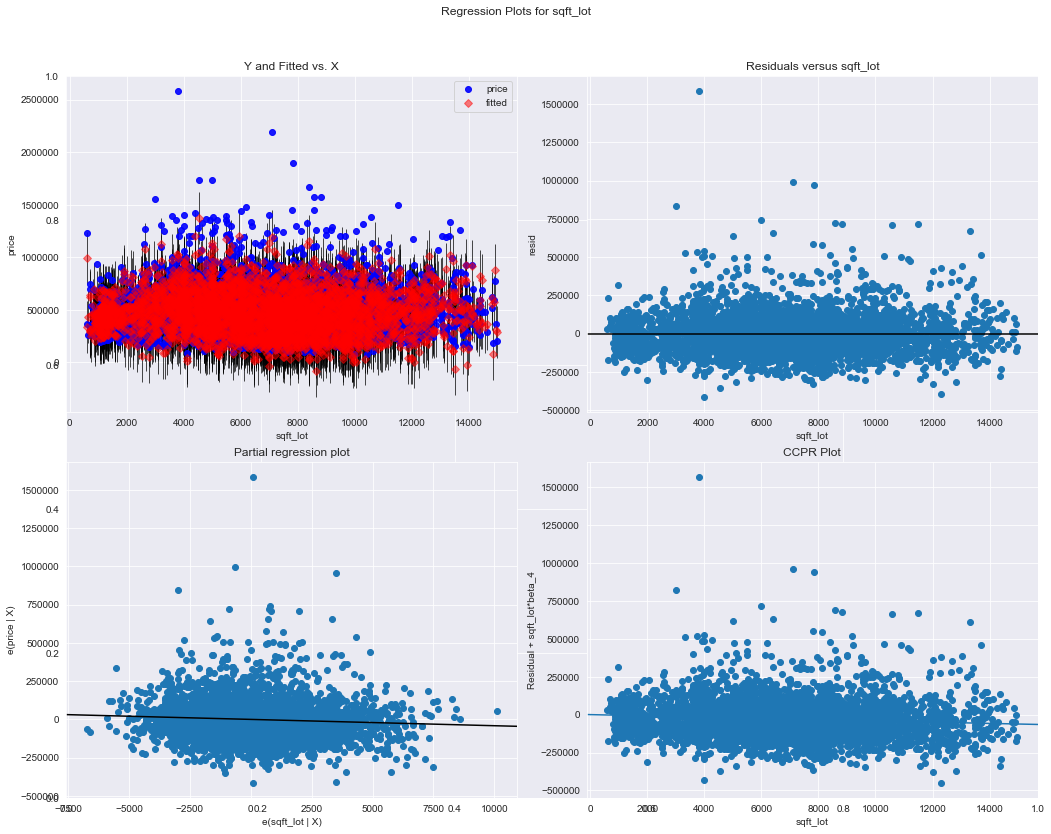

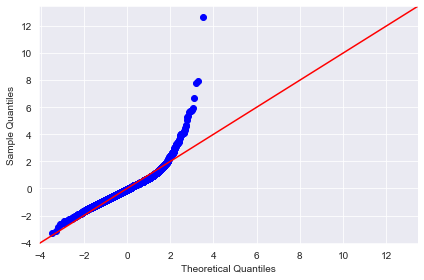

KC Housing Data - Regression Analysis and Diagnostics for SalePrice~view
-------------------------------------------------------------------------------------


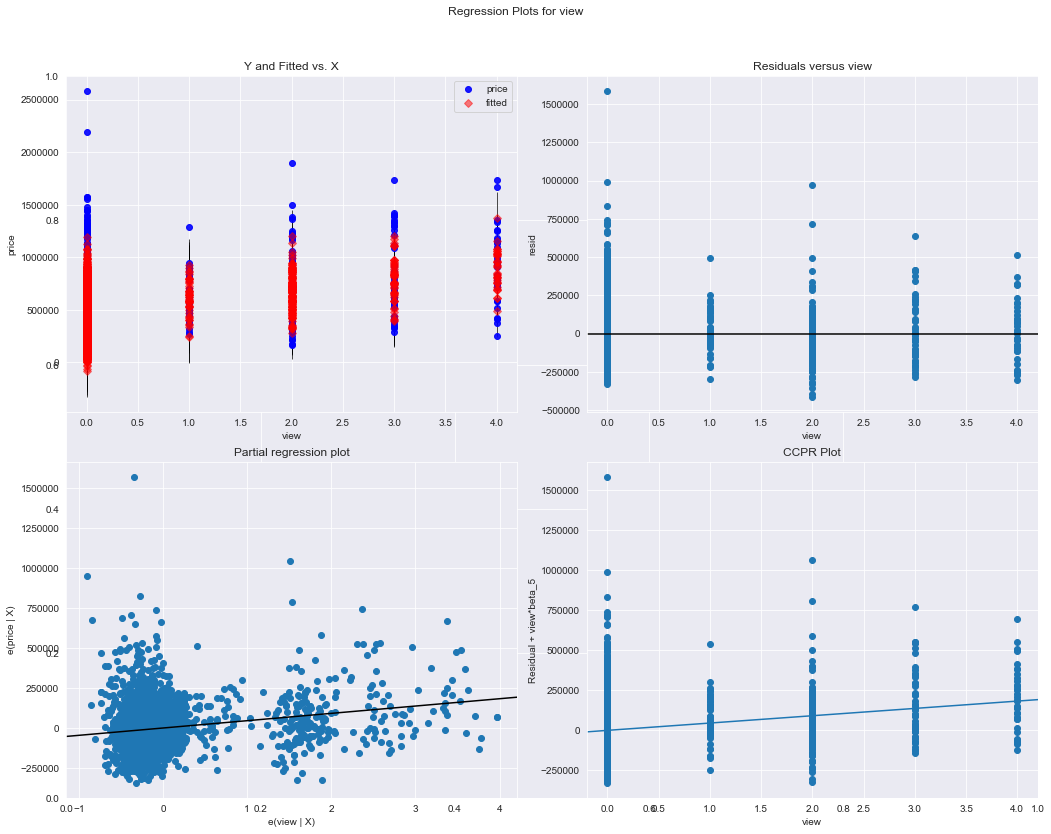

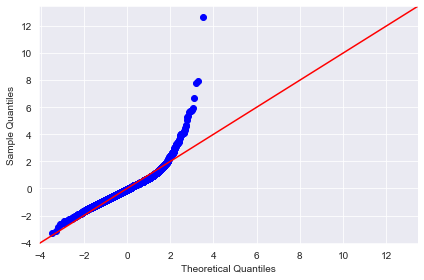

KC Housing Data - Regression Analysis and Diagnostics for SalePrice~condition
-------------------------------------------------------------------------------------


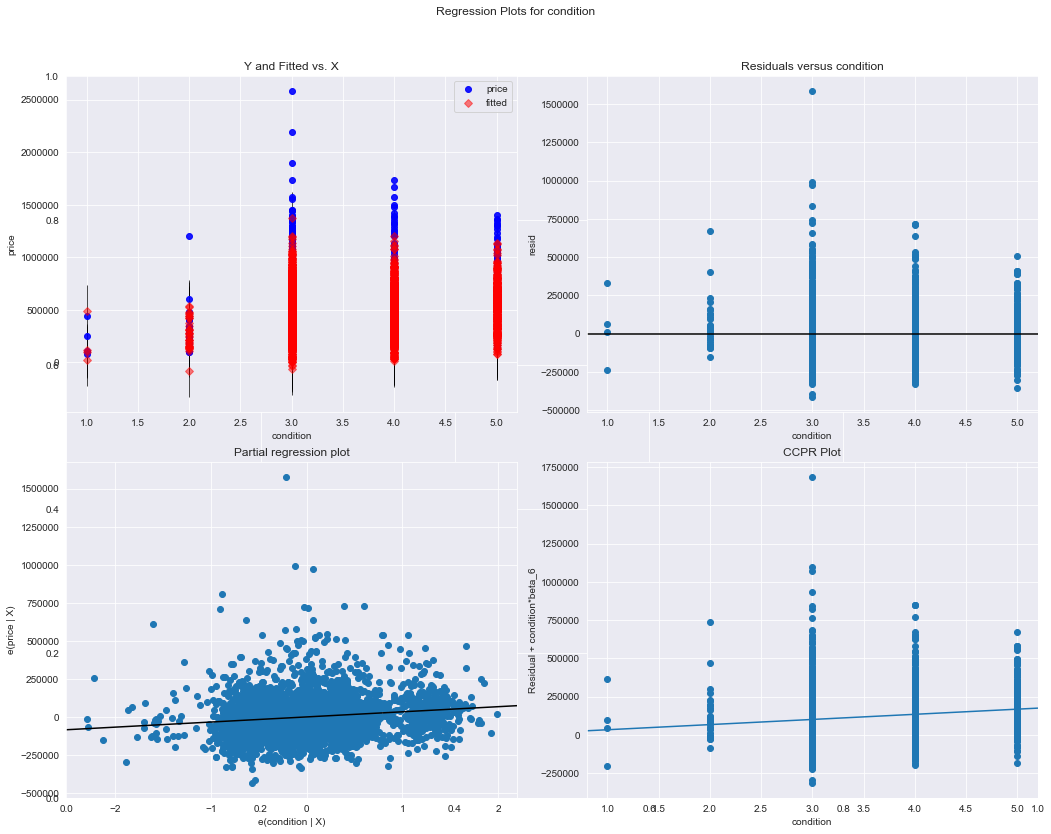

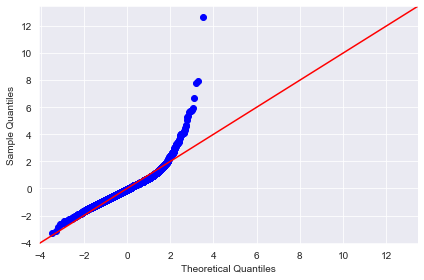

KC Housing Data - Regression Analysis and Diagnostics for SalePrice~grade
-------------------------------------------------------------------------------------


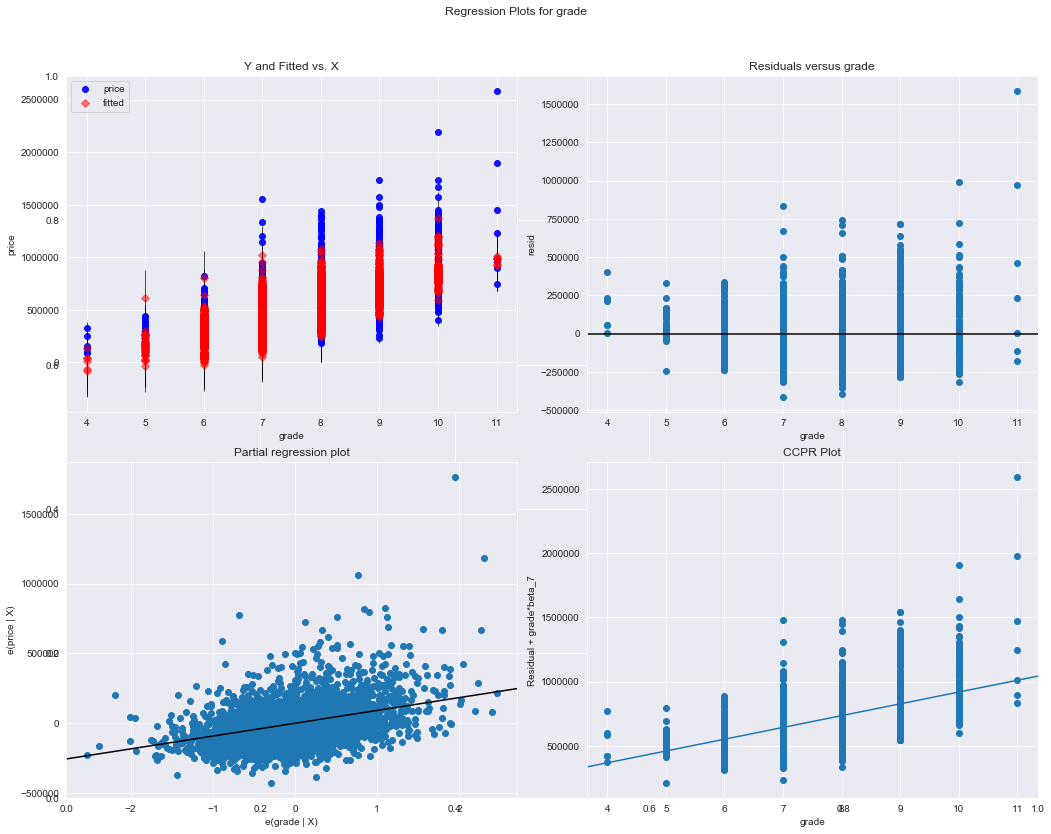

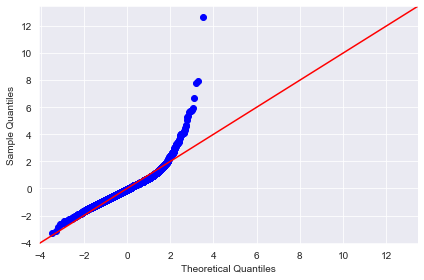

KC Housing Data - Regression Analysis and Diagnostics for SalePrice~sqft_living15
-------------------------------------------------------------------------------------


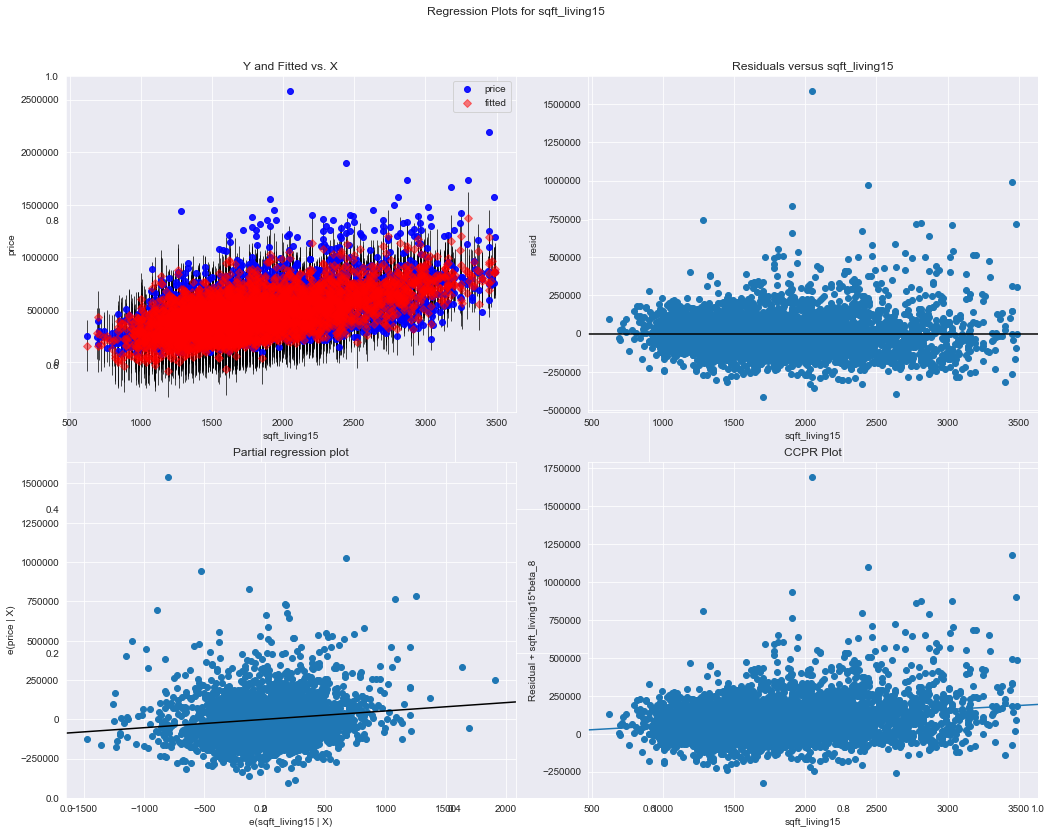

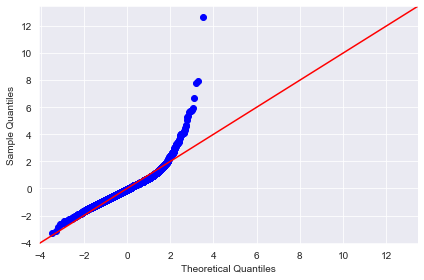

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms


results = []
cont = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'view',
       'condition','grade','sqft_living15']
for idx, column in enumerate(df[cont]):
    print (f"KC Housing Data - Regression Analysis and Diagnostics for SalePrice~{column}")
    print ("-------------------------------------------------------------------------------------")

    f = f'price~{column}'
    model = model
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

The individual features look OK overall, although many of the QQ plots demonstrate a devation

#### Checking the Model Assumptions ####

First, homoscedasticity.

(array([1.000e+00, 3.000e+00, 6.000e+00, 1.400e+01, 5.400e+01, 2.240e+02,
        1.614e+03, 9.364e+03, 2.245e+03, 3.100e+01]),
 array([-1576599.68206162, -1366194.77241382, -1155789.86276602,
         -945384.95311821,  -734980.04347041,  -524575.13382261,
         -314170.2241748 ,  -103765.314527  ,   106639.5951208 ,
          317044.5047686 ,   527449.41441641]),
 <a list of 10 Patch objects>)

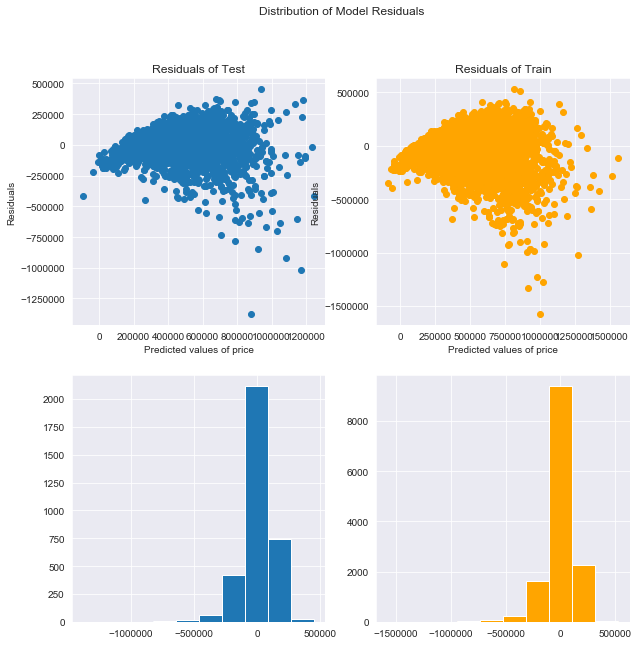

In [16]:
residuals_train = y_hat_train - y_train
residuals_test = y_hat_test - y_test

fig = plt.figure(figsize=(10,10))
fig.suptitle("Distribution of Model Residuals")

ax1 = fig.add_subplot(2,2,1) #Scatterplot of test residuals
ax1.scatter(x=y_hat_test, y=residuals_test)
ax1.set_title('Residuals of Test')
ax1.set_xlabel('Predicted values of price')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(2,2,2) #Scatterplot of train residuals
ax2.scatter(x=y_hat_train, y=residuals_train, c='orange')
ax2.set_title('Residuals of Train')
ax2.set_xlabel('Predicted values of price')
ax2.set_ylabel('Residuals')

ax3 = fig.add_subplot(2,2,3) #Histogram of test residuals
ax3.hist(residuals_test) 

ax4 = fig.add_subplot(2,2,4) #Histogram of train residuals
ax4.hist(residuals_train, color='orange')

Uh oh, that's a cone shape if I've ever seen one. This means the error increases as the price of the listing goes up. We may have to perform another modification of the data. 

Next let's look at the QQplot to check for normality.

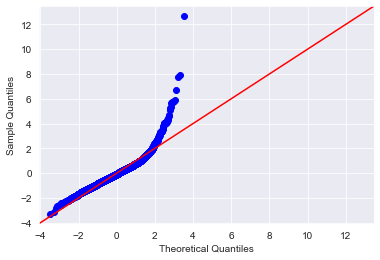

In [17]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Another demonstrates of increased error at the higher ranges. Let's do another modification to the model. 

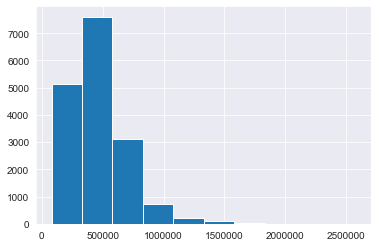

In [21]:
df['price'].hist()

^^ There it is. Let's modiy the data to normalize the pricing. 

In [23]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 625000.0
0.81 percentile: 635128.0000000002
0.82 percentile: 649000.0
0.83 percentile: 657307.9999999994
0.84 percentile: 670000.0
0.85 percentile: 680080.0
0.86 percentile: 697000.0
0.87 percentile: 710000.0
0.88 percentile: 725000.0
0.89 percentile: 740000.0
0.9 percentile: 753600.0000000003
0.91 percentile: 775000.0
0.92 percentile: 796240.0000000007
0.93 percentile: 815939.28
0.94 percentile: 843359.9999999988
0.95 percentile: 875000.0
0.96 percentile: 921572.0
0.97 percentile: 980000.0
0.98 percentile: 1091199.9999999898
0.99 percentile: 1290000.0


In [26]:
#removing extreme outliers >97th percentile 
orig_tot = len(df)
df_pricenorm = df[df.price < 1000000] 
print('Percent removed:', (orig_tot -len(df_pricenorm))/orig_tot)
train, test = train_test_split(df_pricenorm)

Percent removed: 0.02732369430510475


In [27]:
#refit
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     869.3
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:45:23   Log-Likelihood:            -1.6008e+05
No. Observations:               12361   AIC:                         3.202e+05
Df Residuals:                   12328   BIC:                         3.205e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.006e+05   1.39e+04    -14.460      0.000   -2.28e+05   -1.73e+05
bedrooms          -6394.0204   1541.046     -4.149      0.000   -9414.711   -3373.330
bathrooms          1.725e+04   2410.914      7.154      0.000    1.25e+04     2.2e+04
sqft_living          81.4036      2.964     27.463      0.000      75.593      87.214
sqft_lot             -4.6682      0.428    -10.903      0.000      -5.507      -3.829
view               2.911e+04   1784.260     16.317      0.000    2.56e+04    3.26e+04
condition          3.234e+04   1606.519     20.132      0.000    2.92e+04    3.55e+04
grade              7.285e+04   1581.863     46.051      0.000    6.97e+04    7.59e+04
sqft_living15        50.2227      2.841     17.680      0.000      44.655      55.791
Geo_Clusters_1    -2.147e+05   3304.104    -64.989      0.000   -2.21e+05   -2.08e+05
Geo_Clusters_2    -5.588e+04   4380.284    -12.757      0.000   -6.45e+04   -4.73e+04
Geo_Clusters_3    -1.969e+05   3888.971    -50.618      0.000   -2.04e+05   -1.89e+05
Geo_Clusters_4    -9.354e+04   2967.115    -31.526      0.000   -9.94e+04   -8.77e+04
Geo_Clusters_5    -8.982e+04   2627.684    -34.181      0.000    -9.5e+04   -8.47e+04
year_renovated_12 -6.177e+04   7277.491     -8.487      0.000    -7.6e+04   -4.75e+04
year_renovated_4  -1.073e+05   4.24e+04     -2.534      0.011    -1.9e+05   -2.43e+04
year_renovated_5  -1.386e+05   3.48e+04     -3.980      0.000   -2.07e+05   -7.03e+04
year_renovated_6  -1.129e+05   2.16e+04     -5.216      0.000   -1.55e+05   -7.04e+04
year_renovated_7  -2.192e+04   2.34e+04     -0.938      0.348   -6.77e+04    2.39e+04
year_renovated_8   -7.98e+04   1.52e+04     -5.239      0.000    -1.1e+05   -4.99e+04
waterfront_1       2.255e+05   3.48e+04      6.487      0.000    1.57e+05    2.94e+05
year_built_10     -1.459e+05   5002.754    -29.174      0.000   -1.56e+05   -1.36e+05
year_built_11     -1.228e+05   6107.112    -20.100      0.000   -1.35e+05   -1.11e+05
year_built_2      -1.482e+04   4990.458     -2.970      0.003   -2.46e+04   -5037.476
year_built_3      -3.712e+04   6611.849     -5.614      0.000   -5.01e+04   -2.42e+04
year_built_4      -6.362e+04   4543.525    -14.002      0.000   -7.25e+04   -5.47e+04
year_built_5      -7.831e+04   4489.735    -17.442      0.000   -8.71e+04   -6.95e+04
year_built_6      -1.105e+05   4700.293    -23.505      0.000    -1.2e+05   -1.01e+05
year_built_7      -1.288e+05   4922.429    -26.167      0.000   -1.38e+05   -1.19e+05
year_built_8      -1.279e+05   5209.103    -24.544      0.000   -1.38e+05   -1.18e+05
year_built_9      -1.359e+05   5519.334    -24.631      0.000   -1.47e+05   -1.25e+05
month_sold_3       2.698e+04   3281.253      8.221      0.000    2.05e+04    3.34e+04
month_sold_4        3.26e+04   3000.042     10.865      0.000    2.67e+04

In [34]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     301.5
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:49:59   Log-Likelihood:                -53334.
No. Observations:                4121   AIC:                         1.067e+05
Df Residuals:                    4088   BIC:                         1.069e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.435e+05    2.3e+04     -6.238      0.000   -1.89e+05   -9.84e+04
bedrooms          -5919.3218   2646.405     -2.237      0.025   -1.11e+04    -730.928
bathrooms          1.538e+04   4151.670      3.706      0.000    7245.299    2.35e+04
sqft_living          84.2561      5.071     16.615      0.000      74.314      94.198
sqft_lot             -4.3901      0.742     -5.913      0.000      -5.846      -2.934
view               3.198e+04   3385.265      9.448      0.000    2.53e+04    3.86e+04
condition          2.496e+04   2783.737      8.967      0.000    1.95e+04    3.04e+04
grade              6.839e+04   2693.501     25.392      0.000    6.31e+04    7.37e+04
sqft_living15        49.4017      5.008      9.864      0.000      39.583      59.221
Geo_Clusters_1    -2.219e+05   5601.416    -39.614      0.000   -2.33e+05   -2.11e+05
Geo_Clusters_2    -4.806e+04   7505.933     -6.403      0.000   -6.28e+04   -3.33e+04
Geo_Clusters_3    -2.011e+05   6493.277    -30.977      0.000   -2.14e+05   -1.88e+05
Geo_Clusters_4    -1.091e+05   5170.383    -21.106      0.000   -1.19e+05    -9.9e+04
Geo_Clusters_5    -9.366e+04   4596.950    -20.375      0.000   -1.03e+05   -8.47e+04
year_renovated_12  -5.67e+04   1.11e+04     -5.086      0.000   -7.86e+04   -3.48e+04
year_renovated_4  -1.589e+04   1.02e+05     -0.155      0.877   -2.16e+05    1.85e+05
year_renovated_5   -1.27e+05   5.98e+04     -2.125      0.034   -2.44e+05   -9799.113
year_renovated_6  -7.961e+04   7.26e+04     -1.097      0.273   -2.22e+05    6.27e+04
year_renovated_7  -1.677e+05   3.77e+04     -4.454      0.000   -2.42e+05   -9.39e+04
year_renovated_8  -5.042e+04   2.48e+04     -2.035      0.042    -9.9e+04   -1836.226
waterfront_1       1.562e+05   5.28e+04      2.959      0.003    5.27e+04     2.6e+05
year_built_10     -1.505e+05   8347.362    -18.033      0.000   -1.67e+05   -1.34e+05
year_built_11     -1.143e+05   1.05e+04    -10.892      0.000   -1.35e+05   -9.37e+04
year_built_2      -8614.6292   8464.020     -1.018      0.309   -2.52e+04    7979.457
year_built_3      -4.032e+04   1.13e+04     -3.571      0.000   -6.25e+04   -1.82e+04
year_built_4       -5.74e+04   7793.318     -7.366      0.000   -7.27e+04   -4.21e+04
year_built_5       -8.54e+04   7652.999    -11.160      0.000      -1e+05   -7.04e+04
year_built_6       -1.12e+05   7934.328    -14.117      0.000   -1.28e+05   -9.65e+04
year_built_7      -1.339e+05   8253.084    -16.224      0.000    -1.5e+05   -1.18e+05
year_built_8      -1.227e+05   8670.383    -14.154      0.000    -1.4e+05   -1.06e+05
year_built_9      -1.364e+05   9234.278    -14.771      0.000   -1.55e+05   -1.18e+05
month_sold_3       1.148e+04   5625.996      2.041      0.041     452.218    2.25e+04
month_sold_4       2.836e+04   5344.249      5.306      0.000    1.79e+04

The model seems to have faired well - let's recheck the QQ plot.

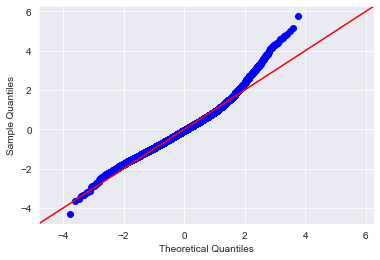

In [28]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Much better! And homoscedasticity?

In [31]:
y = df_pricenorm['price']
X = df_pricenorm[x_cols]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [32]:
model_test = linreg.fit(X_train, y_train)

y_hat_train = model_test.predict(X_train)
y_hat_test = model_test.predict(X_test)

(array([7.000e+00, 3.700e+01, 1.680e+02, 5.430e+02, 2.260e+03, 5.534e+03,
        3.918e+03, 6.750e+02, 3.800e+01, 5.000e+00]),
 array([-585424.14856664, -480962.13336018, -376500.11815372,
        -272038.10294726, -167576.0877408 ,  -63114.07253433,
          41347.94267213,  145809.95787859,  250271.97308505,
         354733.98829151,  459196.00349797]),
 <a list of 10 Patch objects>)

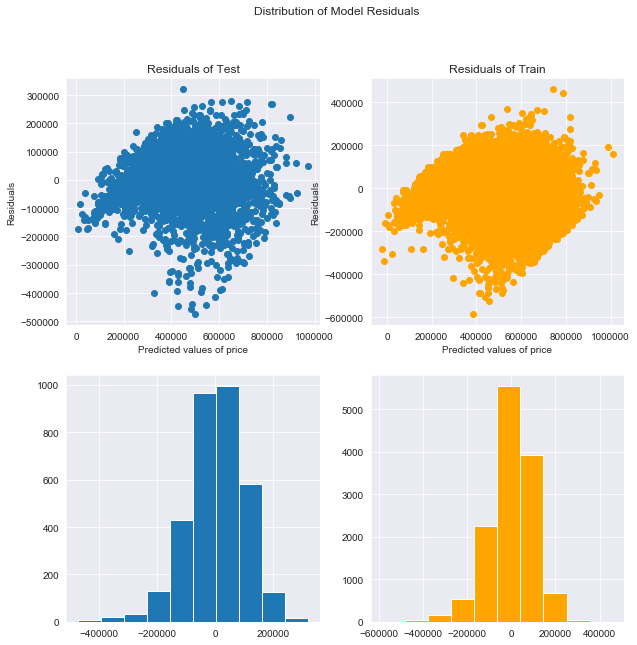

In [33]:
residuals_train = y_hat_train - y_train
residuals_test = y_hat_test - y_test

fig = plt.figure(figsize=(10,10))
fig.suptitle("Distribution of Model Residuals")

ax1 = fig.add_subplot(2,2,1) #Scatterplot of test residuals
ax1.scatter(x=y_hat_test, y=residuals_test)
ax1.set_title('Residuals of Test')
ax1.set_xlabel('Predicted values of price')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(2,2,2) #Scatterplot of train residuals
ax2.scatter(x=y_hat_train, y=residuals_train, c='orange')
ax2.set_title('Residuals of Train')
ax2.set_xlabel('Predicted values of price')
ax2.set_ylabel('Residuals')

ax3 = fig.add_subplot(2,2,3) #Histogram of test residuals
ax3.hist(residuals_test) 

ax4 = fig.add_subplot(2,2,4) #Histogram of train residuals
ax4.hist(residuals_train, color='orange')

Looks like we have our final model (hooray)!!

## Conclusions ##

#### 1. Location, Location, Location ####

The features associated with Location (waterfront, lot square footage, square footage of nearest 15 houses, and geostpatial positioning) had an larger impact on the sale price of the home. **The renovation features like bedrooms, bathrooms, and condition are important but prioritize location over your renovation plans or budget.**

#### 2. GET ON THE WATER ####

If it's within you budget to find a waterfront property you better DO IT. **Having a waterfront view could increase the sale price of your house by 156,200 dollars.** 

#### 3.  Renovations ####

The model did demonstrate that the sale price of the house would increase 84 dollars per sqaure foot, so adding onto a house (especially one that is already on the smaller size) is definitely a recommendation. The model also demonstrates a preference for adding bathrooms (adding 15,380 dollars per bathroom). We'd also like to mention here that both condition and grade were significant in increasing sale price (24,000 and 68,000 dollars for an incrimental improvement respectively). It is unclear what the qualifications for these two parameters are but would obviously be worth investigating and likely fall under the renovations category (updated appliances, flooring, exterior features, etc.).

#### 4. Selling ####

When you've put in all the elbow grease and it's time to sell, our model predicts two factors which have a big impact. First, hire yourself a staging company and a real estate agent because **the more views the house gets, the better.** We won't give a numerical value here because the data is unclear on increased value per view, but we can be certain it improves your sale price. Also **if you sell in March or April you can expect to add 11,000 or 28,000 dollars (respectively) to your final total.**